In [1]:
import cv2
from skimage.exposure import histogram
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage.filters import rank
from skimage.morphology import disk, remove_small_objects
from skimage.util import img_as_ubyte
import numpy as np

file_path = "data/full_images/http___oxalis.br.fgov.be_images_V_BR0_000_026_211_169_BR0000026211169V.jpg"
# be_images_V_BR0_000_026_211_169_BR0000026211169V
# be_images_V_BR0_000_025_412_536_BR0000025412536V.jpg
# be_images_V_BR0_000_025_952_377_BR0000025952377V.jpg"
# be_images_V_BR0_000_025_416_589_BR0000025416589V
# be_images_V_BR0_000_025_416_114_BR0000025416114V
# be_images_V_BR0_000_025_343_045_BR0000025343045V

def plot_mat(mat):
    plt.figure(figsize=(8,12))
    plt.imshow(mat)
    plt.xticks([]), plt.yticks([])
    plt.show()

image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

plot_mat(image)

<Figure size 800x1200 with 1 Axes>

Resized Dimensions :  (4038, 2927, 3)


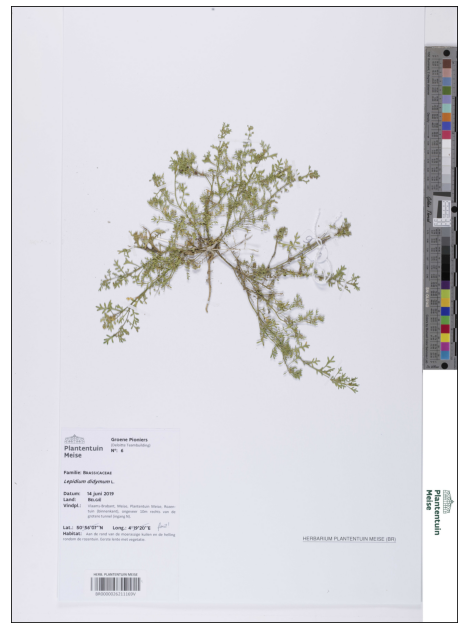

In [2]:
scale_percent = 50 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

print('Resized Dimensions : ', resized.shape)
plot_mat(resized)

2 3
2 2
2 4
3 2
2 3
2 2
2 3
4 2
3 2
2 4
4 25
5 4
2 2
2 2
2 2
2 3
2 2
2 4
3 3
5 2
5 2
4 3
2 2
2 2
2 3
2 3
2 4
2 2
3 2
3 2
2 2
2 2
2 4
3 2
4 2
2 4
2 3
4 2
3 2
2 4
2 2
3 2
2 2
3 3
3 2
3 2
3 2
2 3
2 3
2 2
2 2
3 3
3 2
2 2
2 2
5 2
3 2
3 2
2 2
5 2
4 2
8 2
2 2
5 2
3 2
3 2
2 3
4 4
2 2
3 2
4 2
2 2
2 2
2 3
2 3
2 4
3 2
2 2
2 3
4 3
3 2
2 3
3 2
3 2
2 3
2 2
2 2
2 3
2 3
3 3
2 3
3 4
2 2
2 2
2 2
3 3
2 3
2 2
2 3
2 2
3 2
3 2
2 2
2 2
3 2
2 3
2 3
2 2
2 4
2 3
2 2
3 2
2 2
2 2
6 2
3 2
3 3
2 2
2 3
2 2
2 2
2 3
4 2
2 2
2 4
2 2


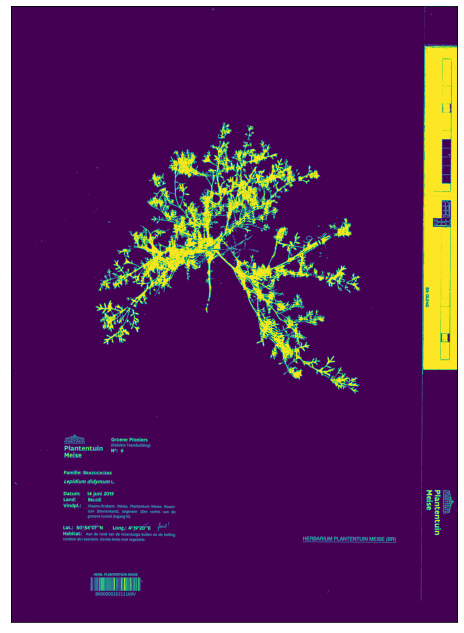

In [6]:
import cv2
import numpy as npThank
from matplotlib import pyplot as plt

def plot_mat(mat):
    plt.figure(figsize=(8,12))
    plt.imshow(mat)
    plt.xticks([]), plt.yticks([])
    plt.show()

def box_extraction(img_for_box_extraction_path, cropped_dir_path):

    img = cv2.imread(img_for_box_extraction_path, 0)  # Read the image
    (thresh, img_bin) = cv2.threshold(img, 128, 255,
                                      cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # Thresholding the image
    img_bin = 255-img_bin  # Invert the image
    #cv2.imwrite("Image_bin.jpg",img_bin)
   
    # Defining a kernel length
    #kernel_length = np.array(img).shape[1]//40
     
    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    #verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    #hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Morphological operation to detect verticle lines from an image
    #img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    #verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    #cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
    # Morphological operation to detect horizontal lines from an image
    #img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    #horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    #cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)
    # Weighting parameters, this will decide the quantity of an image to be added to make a new image.
    #alpha = 0.5
    #beta = 1.0 - alpha
    # This function helps to add two image with specific weight parameter to get a third image as summation of two image.
    #img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
    img_final_bin = cv2.erode(~img_bin, kernel, iterations=2)
    (thresh, img_final_bin) = cv2.threshold(img_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # For Debugging
    # Enable this line to see verticle and horizontal lines in the image which is used to find boxes
    cv2.imwrite("img_final_bin.jpg",img_final_bin)
    # Find contours for image, which will detect all the boxes
    im2, contours, hierarchy = cv2.findContours(
        img_final_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #contours = contours[0] if len(contours) == 2 else contours[1]
    # Sort all the contours by top to bottom.
    #(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")
    idx = 0
    image = img_final_bin.copy()
    for c in contours:
        if len(c) == 4:
            # Returns the location and width,height for every contour
            x, y, w, h = cv2.boundingRect(c)
            print(w,h)
            # If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
            if (w > 50 and h > 30):
                idx += 1
                new_img = img[y:y+h, x:x+w]
                cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)
                cv2.rectangle(img_final_bin, (x, y), (x + w, y + h), (255, 255, 255), 2)
    plot_mat(img_final_bin)
    cv2.imwrite("img_final_bin_boxes.jpg", img_final_bin)
box_extraction(file_path, "data/cropped/")